# Figures 5b and 5c

## Install and read the R packages

In [ ]:
install.packages("data.table")
install.packages("wesanderson")
library(data.table)
library(tidyverse)
library(wesanderson)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



## Download and read the sliced Wasserstein kernel matrix in Figures 5b and 5c

In [ ]:
system("wget https://www.dropbox.com/s/6025fg3qr1203j3/fig5.zip")
system("unzip /content/fig5.zip")
K <- as.matrix(fread("/content/fig5/fig5_wasserstein_kernel_result.tsv",header=TRUE))
filenames <- colnames(K)
cell <- sapply(strsplit(filenames,"_"),function(x){x[2]})
type <- sapply(strsplit(filenames,"_"),function(x){x[3]})
pos <- sapply(strsplit(filenames,"_"),function(x){x[4]})

## Figure 5b

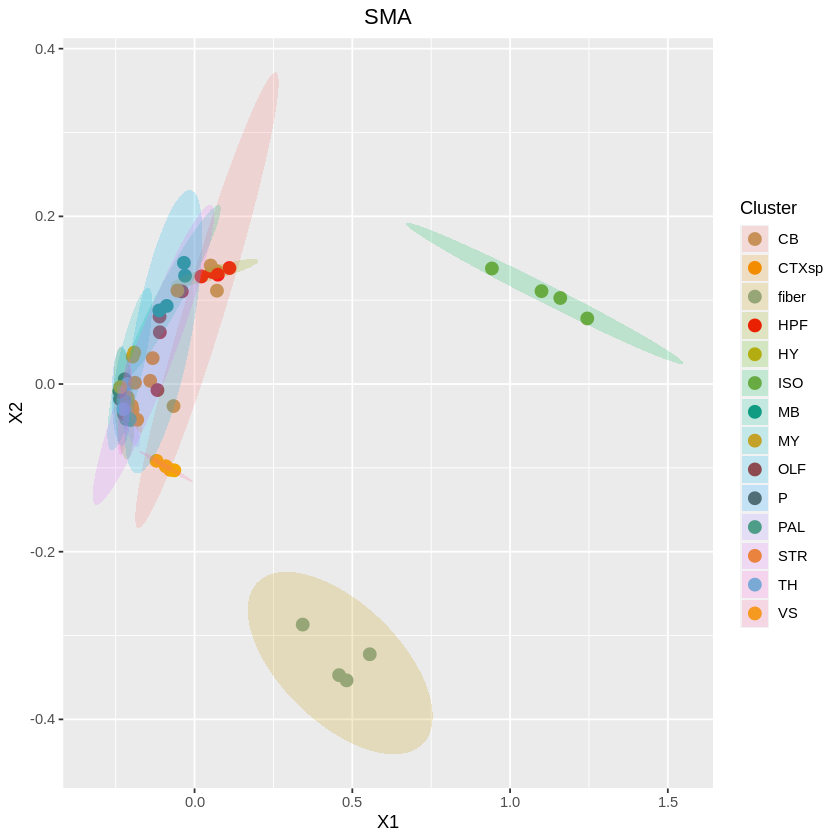

In [ ]:
id <- which(type=="SMA")
obj <- cmdscale(dist(1-K[id,id]))
df <- data.frame(X1=obj[,1],X2=obj[,2],label=pos[id])
write.table(df,"fig5b.tsv",
row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
color <- wes_palette("Darjeeling1", length(unique(pos)), type = "continuous")
set.seed(123456)
color <- sample(color)
ggplot(df, aes(x = X1, y = X2, label = label)) +
  geom_point(aes(x=X1, y=X2, color=factor(label)), size=5, shape=20) +
  stat_ellipse(aes(x=X1,y=X2,fill=factor(label)),
               geom="polygon", level=0.95, alpha=0.2) +
               scale_color_manual(values = color) + 
  guides(color=guide_legend("Cluster"),fill=guide_legend("Cluster")) +
  ggtitle("SMA") + theme(plot.title = element_text(hjust = 0.5))


## Figure 5c

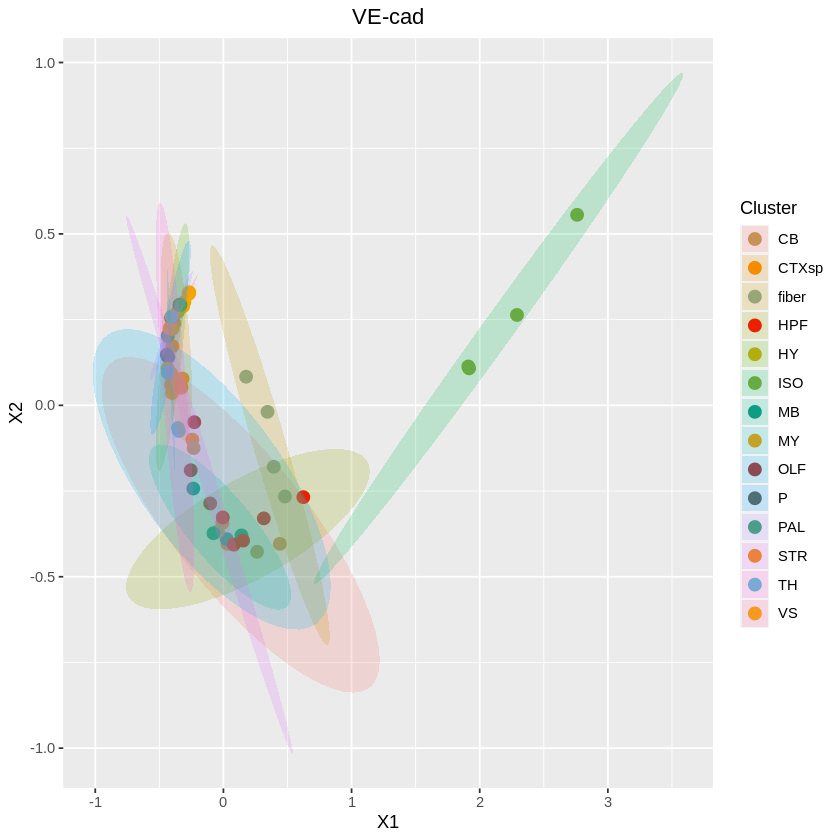

In [ ]:
id <- which(type=="VE-cad")
obj <- cmdscale(dist(1-K[id,id]))
df <- data.frame(X1=obj[,1],X2=obj[,2],label=pos[id])
write.table(df,"fig5c.tsv",
row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
color <- wes_palette("Darjeeling1", length(unique(pos)), type = "continuous")
set.seed(123456)
color <- sample(color)
ggplot(df, aes(x = X1, y = X2, label = label)) +
  geom_point(aes(x=X1, y=X2, color=factor(label)), size=5, shape=20) +
  stat_ellipse(aes(x=X1,y=X2,fill=factor(label)),
               geom="polygon", level=0.95, alpha=0.2) +
               scale_color_manual(values = color) + 
  guides(color=guide_legend("Cluster"),fill=guide_legend("Cluster")) +
  ggtitle("VE-cad") + theme(plot.title = element_text(hjust = 0.5))